In [1]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("TargetDecoy")

# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("mzID")

In [2]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P1001.3.4. Data Processing/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P1001.3.4. Data Processing/Output')
cur_date = "061722"

library(readxl)
library(tidyverse)
library(mzID)
library(TargetDecoy)
library(imputeLCMD)
library(factoextra)


#reading in files
identifiers_df = data.frame(read_excel("Identifiers_030422.xlsx"))
set1_proteome_df = data.frame(read_excel("PC927-Rager_LFQProteome_Results_RawValues_R ready.xlsx", sheet = 1))[,c(1,6,22:35)]
set2_proteome_df = data.frame(read_excel("PC927-Rager_LFQProteome_Results_RawValues_R ready.xlsx", sheet = 2))[,c(1,6,22:35)]

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘mzID’


The following object is masked from ‘package:dplyr’:

    id


The following object is masked from ‘package:purrr’:

    flatten


Warning message in fun(libname, pkgname):
“mzR has been built against a different Rcpp version (1.0.8)
than is installed on your system (1.0.8.3). This might lead to errors
when loading mzR. If you encounter such issues, please send a report,
including the output of sessionInfo() to the Bioc support forum at 
https://support.bioconductor.org/. For details see also
https://github.com/sneumann/mzR/wiki/mzR-Rcpp-compiler-linker-issue.”
Loading required 

In [3]:
head(identifiers_df)
head(set1_proteome_df)
head(set2_proteome_df)

,IDs_from_Core,Our_Analysis_ID,Set
,<chr>,<chr>,<chr>
1,Abundance..Pooled.1,CoCulture_PooledSample1,Set1
2,Abundance..Pooled.2,CoCulture_PooledSample2,Set1
3,Abundance..1..Vehicle,CoCulture_VehicleCT1,Set1
4,Abundance..3..Vehicle,CoCulture_VehicleCT2,Set1
5,Abundance..5..Vehicle,CoCulture_VehicleCT3,Set1
6,Abundance..7..Vehicle,CoCulture_VehicleCT4,Set1


,Accession,Number_of_UniquePeptides,Abundance..Pooled.1,Abundance..Pooled.2,Abundance..1..Vehicle,Abundance..3..Vehicle,Abundance..5..Vehicle,Abundance..7..Vehicle,Abundance..9..Vehicle,Abundance..11..Vehicle,Abundance..2..Wood.Smoke,Abundance..4..Wood.Smoke,Abundance..6..Wood.Smoke,Abundance..8..Wood.Smoke,Abundance..10..Wood.Smoke,Abundance..12..Wood.Smoke
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P02769,99,4.89e+11,4.43e+11,6.26e+11,4.38e+11,4.74e+11,3.40e+11,4.94e+11,4.85e+11,4.54e+11,6.23e+11,7.37e+11,5.13e+11,3.96e+11,6.86e+11
2,P02751,201,2.73e+11,2.41e+11,2.24e+11,2.43e+11,3.24e+11,2.53e+11,2.45e+11,1.35e+11,1.68e+11,2.37e+11,2.98e+11,2.54e+11,1.97e+11,2.50e+11
3,P12763,34,2.63e+11,2.29e+11,3.10e+11,2.33e+11,2.70e+11,2.42e+11,2.71e+11,2.50e+11,2.67e+11,2.86e+11,3.27e+11,2.63e+11,2.52e+11,3.03e+11
4,Q2UVX4,162,5.65e+10,5.15e+10,6.76e+10,4.31e+10,4.09e+10,4.12e+10,4.92e+10,3.53e+10,4.76e+10,4.01e+10,3.68e+10,6.53e+10,4.45e+10,4.69e+10
5,P98160,210,2.27e+10,2.04e+10,3.01e+10,1.79e+10,1.40e+10,2.64e+10,2.81e+10,2.85e+10,1.97e+10,1.40e+10,1.30e+10,2.19e+10,2.46e+10,2.27e+10
6,P12111,201,2.15e+10,2.03e+10,1.55e+10,2.12e+10,2.29e+10,1.99e+10,2.00e+10,9.49e+09,1.67e+10,2.09e+10,2.67e+10,2.63e+10,2.06e+10,2.60e+10


,Accession,Number_of_UniquePeptides,Abundance..Pooled.1,Abundance..Pooled.2,Abundance..13..Vehicle,Abundance..15..Vehicle,Abundance..17..Vehicle,Abundance..19..Vehicle,Abundance..21..Vehicle,Abundance..23..Vehicle,Abundance..14..Wood.Smoke,Abundance..16..Wood.Smoke,Abundance..18..Wood.Smoke,Abundance..20..Wood.Smoke,Abundance..22..Wood.Smoke,Abundance..24..Wood.Smoke
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P02751,193,197908273327,215449909749,290377149672,237808533258,300713328573,246820946145,304313034954,264966884310,243333335207,199860505414,279706283336,225170612912,229939459846,154501914723
2,P02769,97,342657042076,370488835120,308967859550,242917660277,278096520636,259674859546,291397652436,563821412595,281882492897,732144132018,248045691869,233383724786,349312465553,251094645011
3,P07996,34,64580519826,73778236233,181775619913,129485605438,169377550217,134685992120,114143664541,249366551496,132714564698,128084639698,112262919453,111419806864,73857936963,108923410421
4,Q2UVX4,160,41255020284,45525199756,55681501380,35618922477,44222632333,47245712210,44043324866,75943777589,53160804546,68298716794,48638631002,47654755526,35704911241,52145684636
5,P98160,207,16164372416,18035124503,20257643320,13577050138,17442737821,24582420164,20491703047,36081485773,20355674908,16277580495,15654918570,19579785521,16823558423,20030021253
6,P12763,32,180364995691,186934859645,159857253388,143580491033,158608208515,140452510019,145834623969,220324446614,137520441019,237042125375,156248949606,124984210103,171103871588,143324724008


In [4]:
# creating 1 proteome df
set1_proteome_df = set1_proteome_df %>%
    pivot_longer(cols = 3:16, names_to = "IDs_from_Core", values_to = "Value") %>%
    mutate(Set = c("Set1"))

set2_proteome_df = set2_proteome_df %>%
    pivot_longer(cols = 3:16, names_to = "IDs_from_Core", values_to = "Value") %>%
    mutate(Set = c("Set2"))

proteome_df = rbind(set1_proteome_df, set2_proteome_df) %>%
    rename(Protein = Accession)
head(proteome_df)

Protein,Number_of_UniquePeptides,IDs_from_Core,Value,Set
<chr>,<dbl>,<chr>,<dbl>,<chr>
P02769,99,Abundance..Pooled.1,4.89e+11,Set1
P02769,99,Abundance..Pooled.2,4.43e+11,Set1
P02769,99,Abundance..1..Vehicle,6.26e+11,Set1
P02769,99,Abundance..3..Vehicle,4.38e+11,Set1
P02769,99,Abundance..5..Vehicle,4.74e+11,Set1
P02769,99,Abundance..7..Vehicle,3.40e+11,Set1


In [5]:
#adding in our own ids
proteome_df = inner_join(identifiers_df, proteome_df) %>%
    # adding a replicate col so values can be uniquely identified for pca later
#     separate(IDs_from_Core, c(NA, "Exposure"), sep = "_")
    select(-IDs_from_Core) %>%
    rename(ID = Our_Analysis_ID, Unique_Peptides = Number_of_UniquePeptides) %>%
    #creating a col that denotes the general treatment to remove proteins within those treatment groups
    mutate(Treatment = ifelse(grepl("CoCulture_PooledSample", ID), "CoCulture_PooledSample",
                             ifelse(grepl("CoCulture_Vehicle", ID), "CoCulture_Vehicle",
                                   ifelse(grepl("CoCulture_Exposed", ID), "CoCulture_Exposed",
                                         ifelse(grepl("TriCulture_PooledSample", ID), "TriCulture_PooledSample",
                                             ifelse(grepl("TriCulture_Vehicle", ID), "TriCulture_Vehicle",
                                                   ifelse(grepl("TriCulture_Exposed", ID), "TriCulture_Exposed",
                                         
                                         NA)))))))
head(proteome_df)

Joining, by = c("IDs_from_Core", "Set")


,ID,Set,Protein,Unique_Peptides,Value,Treatment
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,CoCulture_PooledSample1,Set1,P02769,99,4.89e+11,CoCulture_PooledSample
2,CoCulture_PooledSample1,Set1,P02751,201,2.73e+11,CoCulture_PooledSample
3,CoCulture_PooledSample1,Set1,P12763,34,2.63e+11,CoCulture_PooledSample
4,CoCulture_PooledSample1,Set1,Q2UVX4,162,5.65e+10,CoCulture_PooledSample
5,CoCulture_PooledSample1,Set1,P98160,210,2.27e+10,CoCulture_PooledSample
6,CoCulture_PooledSample1,Set1,P12111,201,2.15e+10,CoCulture_PooledSample


In [6]:
# intial number of proteins prior to filtering
length(unique(proteome_df$Protein))

[1] 2167

# 1. Peptide Normalization

Normalize to total amount of peptide per sample: sum the abundance values for each sample, then calculate the median value across all of the summed abundance values, and calculate the ratio

In [7]:
normalized_df = proteome_df %>%
    group_by(Set, ID) %>%
    #removing missing data
    drop_na() %>%
    mutate(Summed_Value = sum(Value)) %>%
    #calculating median across all samples but still within each set
    ungroup() %>%
    group_by(Set) %>%
    mutate(Median_of_Sum = median(Summed_Value), Norm_Factor = Summed_Value/ Median_of_Sum, 
           Norm_Value = Value/Norm_Factor) %>%
    select(-c("Summed_Value", "Median_of_Sum", "Norm_Factor"))
head(normalized_df)

ID,Set,Protein,Unique_Peptides,Value,Treatment,Norm_Value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
CoCulture_PooledSample1,Set1,P02769,99,4.89e+11,CoCulture_PooledSample,430002659858
CoCulture_PooledSample1,Set1,P02751,201,2.73e+11,CoCulture_PooledSample,240062834645
CoCulture_PooledSample1,Set1,P12763,34,2.63e+11,CoCulture_PooledSample,231269324218
CoCulture_PooledSample1,Set1,Q2UVX4,162,5.65e+10,CoCulture_PooledSample,49683333910
CoCulture_PooledSample1,Set1,P98160,210,2.27e+10,CoCulture_PooledSample,19961268668
CoCulture_PooledSample1,Set1,P12111,201,2.15e+10,CoCulture_PooledSample,18906047417


I'm getting values on the same order of magnitude, but not exactly the same as those from Proteome Discoverer.

# 2. Log2 Transformation

Did this step later in the imputation functions. 

# 3. Detection Filters (Round 1 & 2)

Round 1 - Unable to replicate the 1% peptide/ 5% protein FDR, so we'll just retain proteins that were identified by at least 2 peptides.

Round 2 - Filter rows based on valid values: 50 % valid in at least one treatment group (i.e. proteins with values observed in fewer than 50% of replicates (here, 3 reps) in at least 1 condition were eliminated from the dataset) 

In [8]:
# only keeping proteins > 2 unique proteins
detection_filter_1_df = proteome_df %>%
    filter(Unique_Peptides > 2)

removed_proteins_df = detection_filter_1_df %>%
    #creating 2 count cols: 1st for non-missing data, 2nd for all data
    mutate(data_count = ifelse(is.na(Value), 0, 1), all_count = 1) %>%
    group_by(Set, Treatment, Protein) %>%
    summarize(Protein_Presence = sum(data_count)/ sum(all_count) * 100) %>%
    filter(Protein_Presence < 50) %>%
    arrange(Protein_Presence) #%>%
    #just want a column that specifies the treatment and exposure separately to more easily remove proteins later
    #separate(Treatment, c("Treatment", "Exposure"), sep = "_") %>%
    #select(-Exposure)

head(removed_proteins_df)

#removed_proteins = unique(removed_proteins_df$Protein)

#number of proteins removed
length(unique(removed_proteins_df$Protein))

`summarise()` has grouped output by 'Set', 'Treatment'. You can override using
the `.groups` argument.


Set,Treatment,Protein,Protein_Presence
<chr>,<chr>,<chr>,<dbl>
Set1,CoCulture_Exposed,O75146,0
Set1,CoCulture_Exposed,O95810,0
Set1,CoCulture_Exposed,P11387,0
Set1,CoCulture_Exposed,P27694,0
Set1,CoCulture_Exposed,P49736,0
Set1,CoCulture_Exposed,P52292,0


[1] 54

In [9]:
# removing those 54 proteins from the entire dataset (but within each set)

# finding proteins that exist only in the proteome_df but not the removed proteins_df
`%notin%` <- Negate(`%in%`)
detection_filter_2_df = #proteome_df %>% filter(Protein %notin% removed_proteins)
    anti_join(detection_filter_1_df, removed_proteins_df)
head(detection_filter_2_df)

# number of proteins kept
length(unique(detection_filter_2_df$Protein))

Joining, by = c("Set", "Protein", "Treatment")


,ID,Set,Protein,Unique_Peptides,Value,Treatment
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,CoCulture_PooledSample1,Set1,P02769,99,4.89e+11,CoCulture_PooledSample
2,CoCulture_PooledSample1,Set1,P02751,201,2.73e+11,CoCulture_PooledSample
3,CoCulture_PooledSample1,Set1,P12763,34,2.63e+11,CoCulture_PooledSample
4,CoCulture_PooledSample1,Set1,Q2UVX4,162,5.65e+10,CoCulture_PooledSample
5,CoCulture_PooledSample1,Set1,P98160,210,2.27e+10,CoCulture_PooledSample
6,CoCulture_PooledSample1,Set1,P12111,201,2.15e+10,CoCulture_PooledSample


[1] 1456

In [10]:
# check to ensure I've kept the correct number of proteins (number of proteins removed)
length(unique(proteome_df$Protein)) - length(unique(detection_filter_2_df$Protein))

[1] 711

# 5. QRILC Imputation

QRILC replaces data with left-censored data from a Gaussian distribution. 

In [11]:
# going back and retrieve proteins with missing data not in the removed proteins df
missing_data_df = detection_filter_1_df %>%
    #creating 2 count cols: 1st for non-missing data, 2nd for all data
    mutate(data_count = ifelse(is.na(Value), 0, 1), all_count = 1) %>%
    group_by(Set, Treatment, Protein) %>%
    mutate(Protein_Presence = sum(data_count)/ sum(all_count) * 100) %>%
    filter(Protein_Presence > 50, is.na(Value)) %>%
    # adding a col for the unimputed normalized value
    mutate(Norm_Value = NA)

missing_data_df = missing_data_df[,c(1,2,6,3,5,10)]
head(missing_data_df)

ID,Set,Treatment,Protein,Value,Norm_Value
<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,Q8IZ83,NA,NA
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P02668,NA,NA
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P23921,NA,NA
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,O60841,NA,NA
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,Q8NC51,NA,NA
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P50570,NA,NA


In [12]:
# number of proteins with missing data that will be added back to the dataset
length(unique(missing_data_df$Protein))

[1] 210

In [13]:
# adding in normalized values to the filtered df
# left join returns all the records from the first table along with matching records from the second
detection_filter_normalized_df = left_join(detection_filter_2_df, normalized_df) 

preimputed_df = rbind(detection_filter_normalized_df %>% 
                      select(-Unique_Peptides), missing_data_df) %>%
    unique()


# for some reason this protein had 2 entries, so removing the entries with all the missing data
single_protein_missing_data = preimputed_df %>%
    filter(is.na(Value) , Protein == "P08727")
preimputed_df = anti_join(preimputed_df, single_protein_missing_data)

preimputed_df = preimputed_df[, c(1,2,5,3,4,6)]
head(preimputed_df)

Joining, by = c("ID", "Set", "Protein", "Unique_Peptides", "Value",
"Treatment")
Joining, by = c("ID", "Set", "Protein", "Value", "Treatment", "Norm_Value")


,ID,Set,Treatment,Protein,Value,Norm_Value
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,CoCulture_PooledSample1,Set1,CoCulture_PooledSample,P02769,4.89e+11,430002659858
2,CoCulture_PooledSample1,Set1,CoCulture_PooledSample,P02751,2.73e+11,240062834645
3,CoCulture_PooledSample1,Set1,CoCulture_PooledSample,P12763,2.63e+11,231269324218
4,CoCulture_PooledSample1,Set1,CoCulture_PooledSample,Q2UVX4,5.65e+10,49683333910
5,CoCulture_PooledSample1,Set1,CoCulture_PooledSample,P98160,2.27e+10,19961268668
6,CoCulture_PooledSample1,Set1,CoCulture_PooledSample,P12111,2.15e+10,18906047417


In [14]:
#first splitting df to impute within set and treatment (not imputing pooled treatment groups)
preimputed_df_split = preimputed_df %>%
    group_by(Set, Treatment) %>%
    group_split()

coculture_exp_preimputed_df = preimputed_df_split[[1]]
coculture_pooled_preimputed_df = preimputed_df_split[[2]]
coculture_vehicleCT_preimputed_df = preimputed_df_split[[3]] %>%
    #for some reason this protein had another duplicate value, so removing it here
    filter(Protein != "P08727" | Value != 17368304)
triculture_exp_preimputed_df = preimputed_df_split[[4]]
triculture_pooled_preimputed_df = preimputed_df_split[[5]]
triculture_vehicleCT_preimputed_df = preimputed_df_split[[6]]

In [15]:
# QRILC
QRILC_imputation = function(dataset){
    wider_dataset = dataset %>%
        select(-c("Set", "Value", "Treatment")) %>%
        pivot_wider(names_from = Protein, values_from = Norm_Value) %>%
        select(-ID)
    
    #normalizing data since that's what the QRILC function wants
    QRILC_prep = wider_dataset %>%
         mutate_all(., function(x) log2(x)) %>%
         as.matrix()

    imputed_QRILC_object = impute.QRILC(QRILC_prep, tune.sigma = 0.1)
    QRILC_log2_df = data.frame(imputed_QRILC_object[1]) 
    
    #converting back the original scale
    QRILC_df = QRILC_log2_df %>%
        mutate_all(., function(x) 2^x - 1)
    
    # adding a replicate col so values can be uniquely identified for pca later
    QRILC_df = cbind(Rep = 1:6, QRILC_df)
            
    #adding back in ID, Tx, and Set columns
    final_pivoted_column_number = dim(QRILC_df)[2] + 3
    #print(data.frame(cbind(dataset[1:6,1:3], QRILC_df)))
    imputed_dataset = data.frame(cbind(dataset[1:6,1:3], QRILC_df)) %>%
        pivot_longer(cols = 5:all_of(final_pivoted_column_number), names_to = "Protein", values_to = "Value")
    
    return(imputed_dataset)
}

# calling fn
coculture_exp_imputed_df = QRILC_imputation(coculture_exp_preimputed_df)
coculture_vehicleCT_imputed_df = QRILC_imputation(coculture_vehicleCT_preimputed_df)
triculture_exp_imputed_df = QRILC_imputation(triculture_exp_preimputed_df)
triculture_vehicleCT_imputed_df = QRILC_imputation(triculture_vehicleCT_preimputed_df)

In [16]:
head(coculture_exp_imputed_df)
# imputed_df = rbind(coculutre_exp_imputed_df, coculutre_vehicleCT_imputed_df, triculutre_exp_imputed_df,
#                   triculutre_vehicleCT_imputed_df)
# head(imputed_df)

ID,Set,Treatment,Rep,Protein,Value
<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
CoCulture_Exposed1,Set1,CoCulture_Exposed,1,P02769,498266095581
CoCulture_Exposed1,Set1,CoCulture_Exposed,1,P02751,184380405413
CoCulture_Exposed1,Set1,CoCulture_Exposed,1,P12763,293033144317
CoCulture_Exposed1,Set1,CoCulture_Exposed,1,Q2UVX4,52241114866
CoCulture_Exposed1,Set1,CoCulture_Exposed,1,P98160,21620797539
CoCulture_Exposed1,Set1,CoCulture_Exposed,1,P12111,18328290299


# 6. PCA

Using PCA to identify and remove outlier proteins.

In [25]:
coculture_exp_imputed_df %>%
    select(-c("Set", "Treatment", "ID")) %>%
    pivot_wider(names_from = Rep, values_from = Value)

Protein,1,2,3,4,5,6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
P02769,498266095581,608360548946,615901141484,5.13e+11,443295990347,592484922889
P02751,184380405413,231430899037,249034654222,2.54e+11,220528560854,215920161402
P12763,293033144317,279279481538,273269570237,2.63e+11,282097448402,261695235620
Q2UVX4,52241114866,39157717515,30753272735,6.53e+10,49814827197,40506622278
P98160,21620797539,13671023571,10863927868,2.19e+10,27538084248,19605550654
P12111,18328290299,20408885188,22312836468,2.63e+10,23060346972,22455696785
Q28085,53667868003,42477823240,39277277678,4.79e+10,43322108147,43270400344
Q0IIK2,44119597009,51559288899,56910268296,4.14e+10,41978786964,50611685832
P21333,6354538971,3154100437,4721630188,6.47e+09,9940576752,7082181293


In [17]:
pca_prep_coculture_exp_df = coculture_exp_imputed_df %>%
    select(-c("Set", "Treatment", "ID")) %>%
    pivot_wider(names_from = Protein, values_from = Value) %>%
    select(-c("ID", "Rep"))
pca_prep_coculture_vehicleCT_df = coculture_vehicleCT_imputed_df %>%
    select(-c("Set", "Treatment")) %>%
    pivot_wider(names_from = Protein, values_from = Value) %>%
    select(-c("ID", "Rep"))
pca_prep_triculture_exp_df = triculture_exp_imputed_df %>%
    select(-c("Set", "Treatment")) %>%
    pivot_wider(names_from = Protein, values_from = Value) %>%
    select(-c("ID", "Rep"))
pca_prep_triculture_vehicleCT_df = triculture_vehicleCT_imputed_df %>%
    select(-c("Set", "Treatment")) %>%
    pivot_wider(names_from = Protein, values_from = Value) %>%
    select(-c("ID", "Rep"))

head(pca_prep_coculture_exp_df)

P02769,P02751,P12763,Q2UVX4,P98160,P12111,Q28085,Q0IIK2,P21333,O00468,⋯,P60891,Q13591,O94813,Q93009,P12645,P61923,P06744,P50479,O14744,P05161
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
498266095581,184380405413,293033144317,52241114866,21620797539,18328290299,53667868003,44119597009,6354538971,16462536197,⋯,1240177726,2383392,87991377,861054.8,1916427.0,2102487,969411.9,4353406,1381903.8,1295933
608360548946,231430899037,279279481538,39157717515,13671023571,20408885188,42477823240,51559288899,3154100437,18358231653,⋯,842720952,4998521,33247085,645186.7,2660778.6,1577908,1001024.2,1260476,690817.7,3758189
615901141484,249034654222,273269570237,30753272735,10863927868,22312836468,39277277678,56910268296,4721630188,13705262849,⋯,716183552,7706631,48422591,654788.3,1080643.1,1695054,1926600.4,5449721,885518.2,1672603
512999999999,253999999999,262999999999,65299999999,21899999999,26299999999,47899999999,41399999999,6469999999,13999999999,⋯,1349999999,4734796,21449327,1326897.0,833149.4,3332031,896503.9,2562914,1837133.0,3272891
443295990347,220528560854,282097448402,49814827197,27538084248,23060346972,43322108147,41978786964,9940576752,18134835968,⋯,1264960780,3771444,71378288,635310.7,5420713.0,8063428,977910.1,6647044,4021361.9,4004041
592484922889,215920161402,261695235620,40506622278,19605550654,22455696785,43270400344,50611685832,7082181293,17014508718,⋯,889591064,3900002,69720184,664128.2,3933255.9,4294186,4726821.3,5734715,1890778.2,1454812


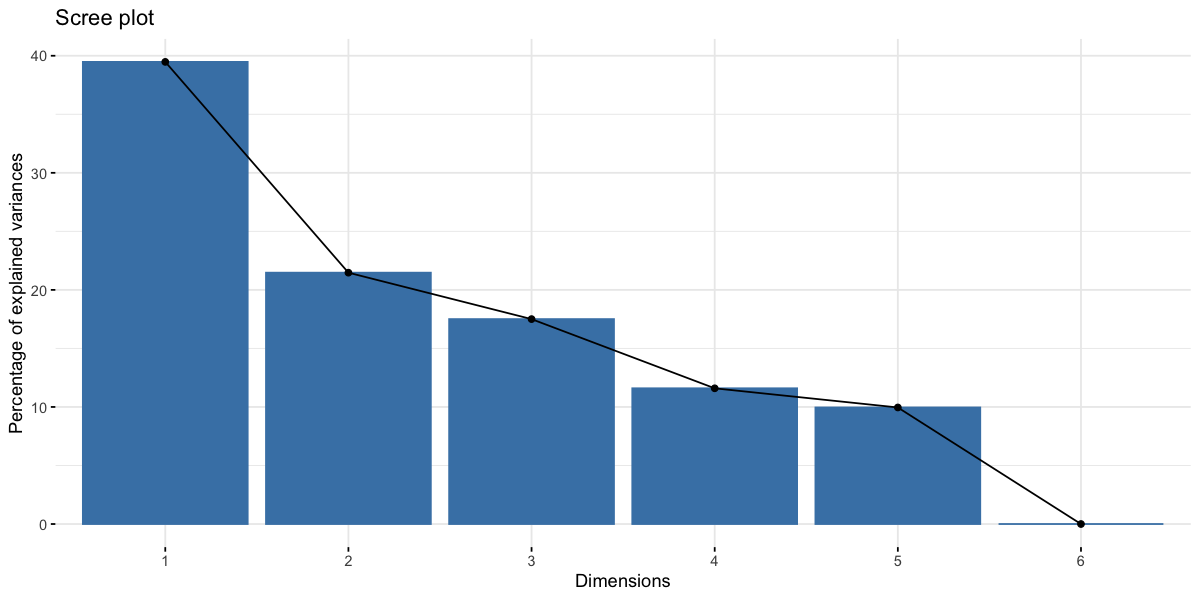

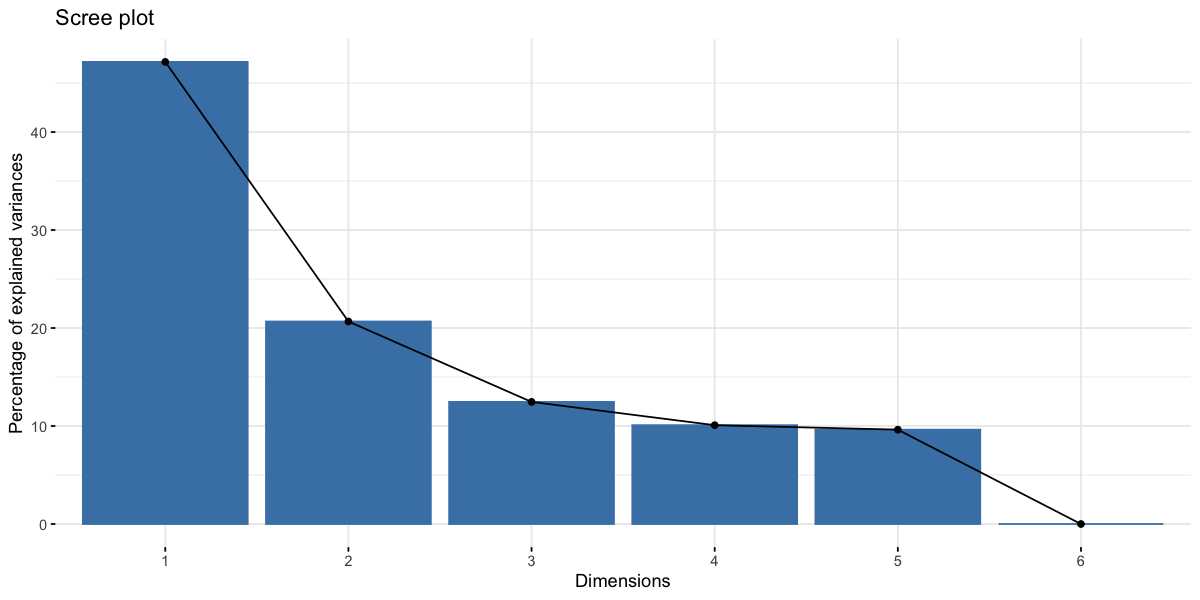

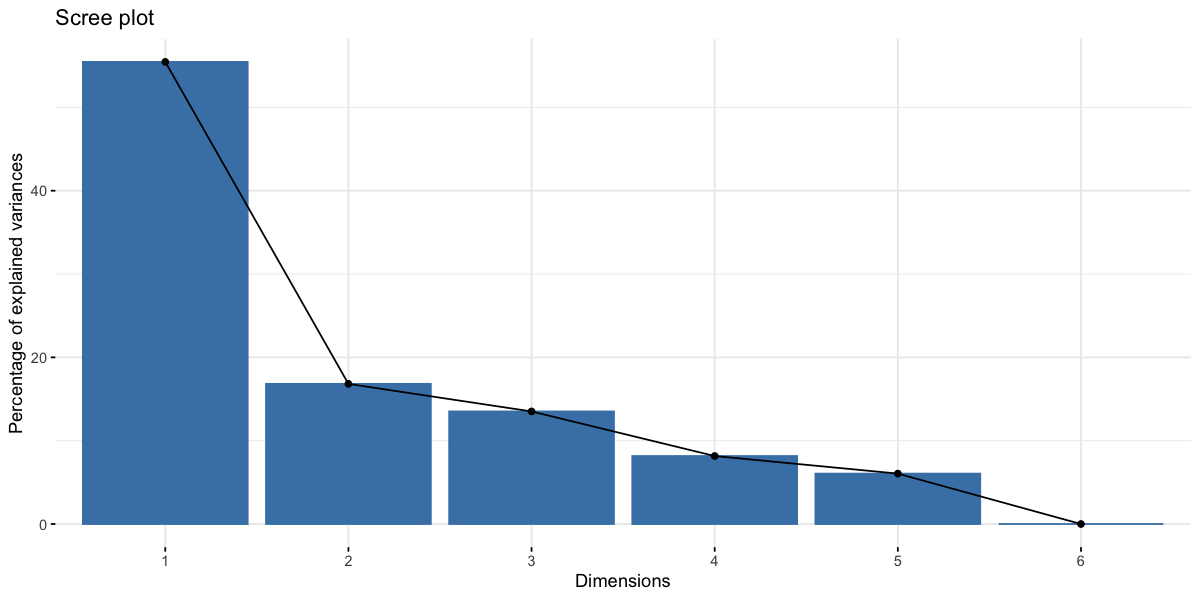

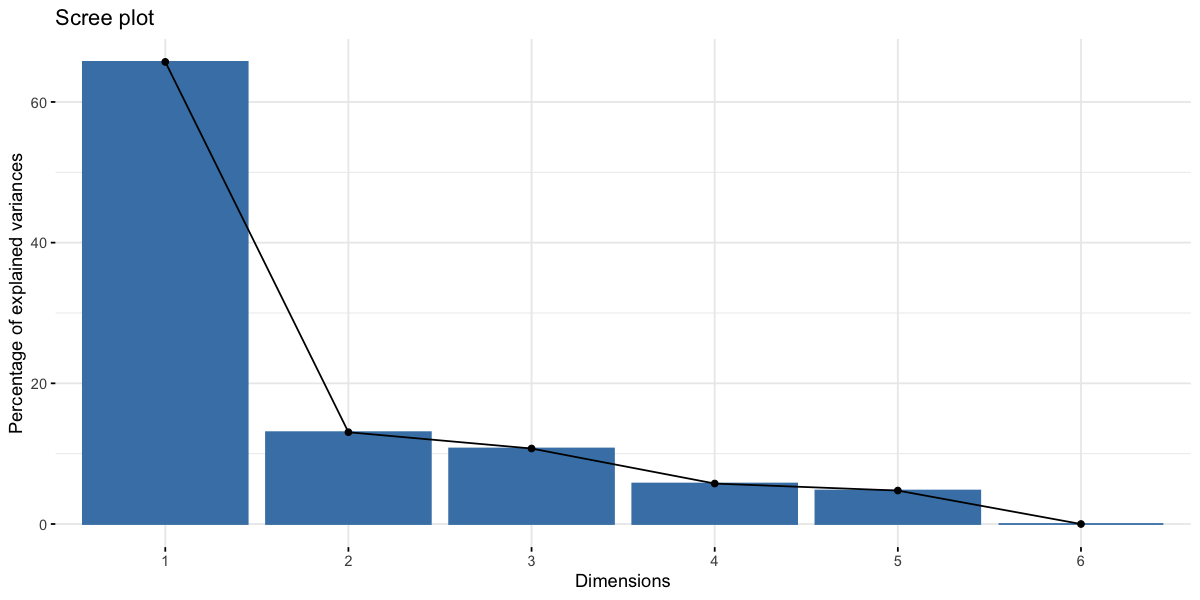

In [20]:
# running PCA
pca_coculture_exp = prcomp(pca_prep_coculture_exp_df, scale = TRUE)
pca_coculture_vehicleCT = prcomp(pca_prep_coculture_vehicleCT_df, scale = TRUE)
pca_triculture_exp = prcomp(pca_prep_triculture_exp_df, scale = TRUE)
pca_triculture_vehicleCT = prcomp(pca_prep_triculture_vehicleCT_df, scale = TRUE)

# viewing scree plots to see how much of the variance was captured in first 2 eigenvectors
options(repr.plot.width=10, repr.plot.height=5) #changing size
fviz_eig(pca_coculture_exp)
fviz_eig(pca_coculture_vehicleCT)
fviz_eig(pca_triculture_exp)
fviz_eig(pca_triculture_vehicleCT)

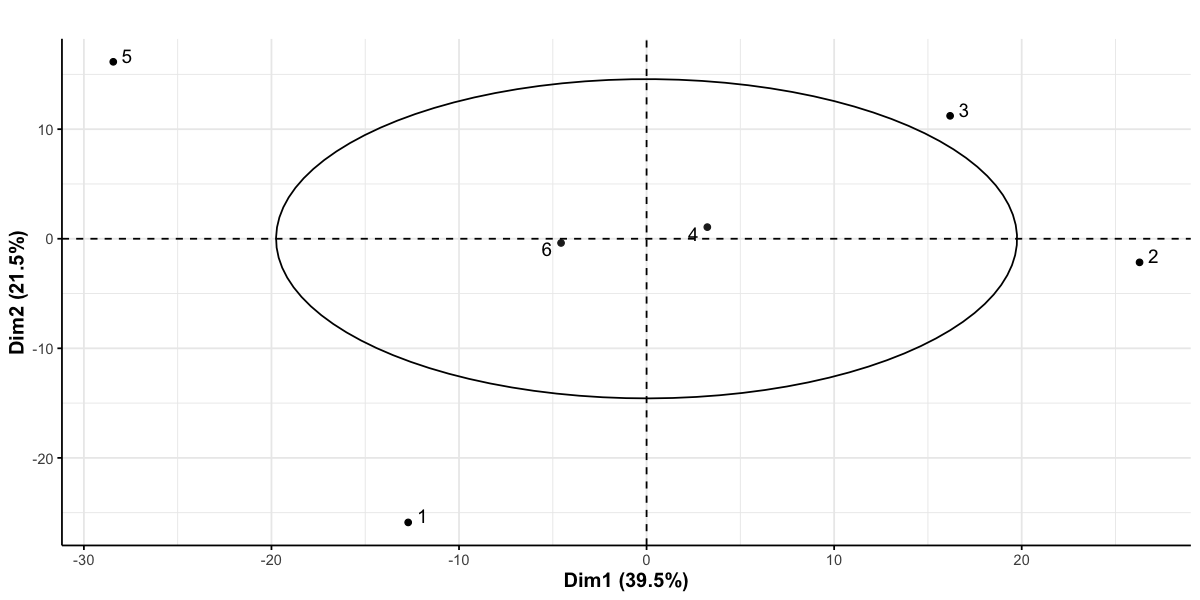

In [21]:
# visualizing all data to detect outliers
fviz_pca_ind(pca_coculture_exp, 
             #col.ind = food_data$Cases_vs_median, # color by cases_vs_median
             #adding 95% confidence ellipses for each group
             addEllipses = TRUE, # Concentration ellipses
             ellipse.type = "confidence",
             repel = TRUE, title = "") +
theme(axis.line = element_line(colour = "black"), #making x and y axes black
      legend.title = element_text(size = 9, face = "bold"),
      legend.text = element_text(size = 8),
      legend.position = 'bottom',
      axis.title = element_text(face = "bold", size = rel(1.1))) #+ #changes axis titles

  #labs(x = "Dimension 1 (26.7%)", y = ("Dimension 2 (10.8%)")) 

In [14]:
#exporting results
write.csv(imputed_df, paste0(Output,"/", cur_date, "_Imputed_Proteomics_Data.csv"), row.names = FALSE)